In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("./poisons.csv", index_col=0)

In [107]:
df.head(10)

,time,poison,treat
1,0.31,1,A
2,0.45,1,A
3,0.46,1,A
4,0.43,1,A
5,0.36,2,A
6,0.29,2,A
7,0.40,2,A
8,0.23,2,A
9,0.22,3,A
10,0.21,3,A


# 이원배치분산분석
## poisons
- 독립변수 : 'poison' , 'treat'
- 종속변수 : 'time'

### Q1. 이원배치분산분석의 가정을 서술하라

### A1.
### 집단의 측정치는 서로 독립(독립성)
### 정규분포를 따름(정규성)
### 측정치의 분산은 같다(등분산 가정)

### Q2. 독립변수와 종속변수간의 관계를 시각화 하라

### A2. 시각화 코드 작성

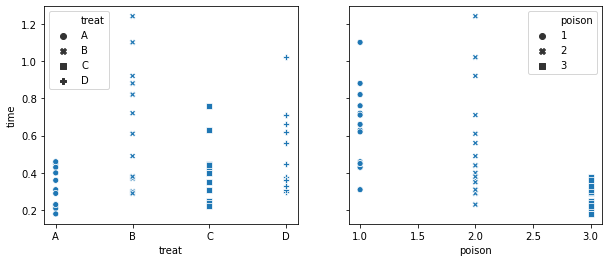

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

fig , ((ax1,ax2)) = plt.subplots(nrows=1 , ncols=2, figsize = (10,4), sharey= True)

sns.scatterplot(x = 'treat', y='time' ,style = 'treat', data = df, ax = ax1)
sns.scatterplot(x = 'poison', y='time' ,style = 'poison', data = df, ax = ax2)

### Q3. 분산분석의 가설을 모두 작성하라(귀무가설, 대립가설)

### A3. 
- 귀무가설1 (H0) : treat 와 poison 변수의 상호작용(교호작용)가 없다
- 귀무가설2 (H0) : treat 변수에 따른 time 변수 값에는 차이가 없다
- 귀무가설3 (H0) : poison 변수에 따른 time 변수 값에는 차이가 없다
- 대립가설1 (H1) :  treat 와 poison 변수의 상호작용(교호작용)가 없다
- 대립가설2 (H1) :  treat 변수에 따른 time 변수 값에는 차이가 있다
- 대립가설3 (H1) : poison 변수에 따른 time 변수 값에는 차이가 없다

### Q4. 가설검정을 실시하라.

### A4. anova 코드 구현

In [45]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('time ~ C(treat) + C(poison) + C(treat)*C(poison)', df).fit()
aov_table = anova_lm(model, typ=2)

In [46]:
aov_table

,sum_sq,df,F,PR(>F)
C(treat),0.921206,3.0,13.805582,3.777331e-06
C(poison),1.033012,2.0,23.221737,3.331440e-07
C(treat):C(poison),0.250138,6.0,1.874333,1.122506e-01
Residual,0.800725,36.0,NaN,NaN


- poison -> p < 0.05로 유의미. 즉 poison의 수준에 따라 평균에 차이가 난다고 볼 수 있음
- treat  -> p < 0.05로 유의미. 즉 treat의 수준에 따라 평균에 차이가 난다고 볼 수 있음
- poison:treat -> p > 0.05로 유의미하지 않음. 상호작용 효과는 발견하지 못함

### Q5. 교호작용 효과 존재 유무를 시각화하여 확인하라

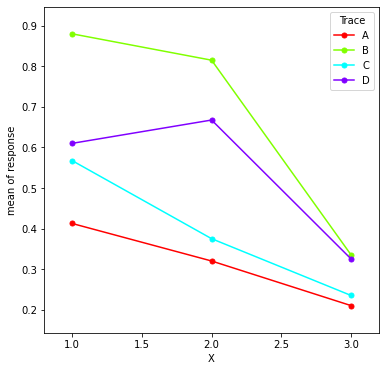

In [137]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

treat = df['treat'].ravel()
poison = df['poison'].ravel()
time = df['time'].ravel()

fig, ax = plt.subplots(figsize = (6,6))
fig = interaction_plot(poison, treat, time,ms=10, ax= ax)

### Q6 사후검정을 실시하라

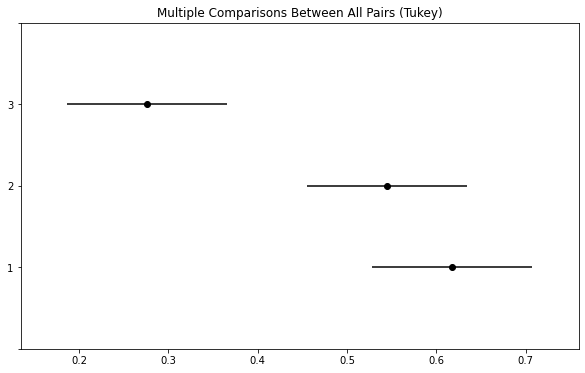

In [138]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data = df['time'], groups = df['poison'])
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tuekeyhsd.plot_simultaneous()

In [139]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.0731,0.5829,-0.2525,0.1063,False
1,3,-0.3412,0.001,-0.5206,-0.1619,True
2,3,-0.2681,0.0021,-0.4475,-0.0887,True


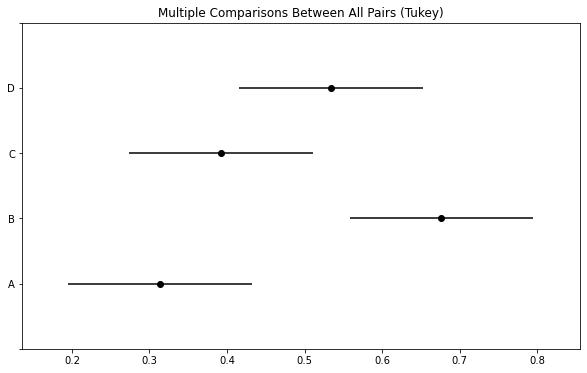

In [140]:
mc = MultiComparison(data = df['time'], groups = df['treat'])
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tuekeyhsd.plot_simultaneous()

In [141]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,0.3625,0.001,0.1253,0.5997,True
A,C,0.0783,0.7923,-0.1589,0.3156,False
A,D,0.22,0.078,-0.0172,0.4572,False
B,C,-0.2842,0.0132,-0.5214,-0.0469,True
B,D,-0.1425,0.3881,-0.3797,0.0947,False
C,D,0.1417,0.3934,-0.0956,0.3789,False
